In [1]:
from pathlib import Path
import random

import matplotlib.pyplot as plt
from PIL import Image

DATA_ROOT = Path("../data/processed/distraction_binary")  # notebook is inside notebooks/
SPLITS = ["train", "val", "test"]
CLASSES = ["not_distracted", "distracted"]

# sanity
assert DATA_ROOT.exists(), f"Missing {DATA_ROOT.resolve()}"

Matplotlib is building the font cache; this may take a moment.


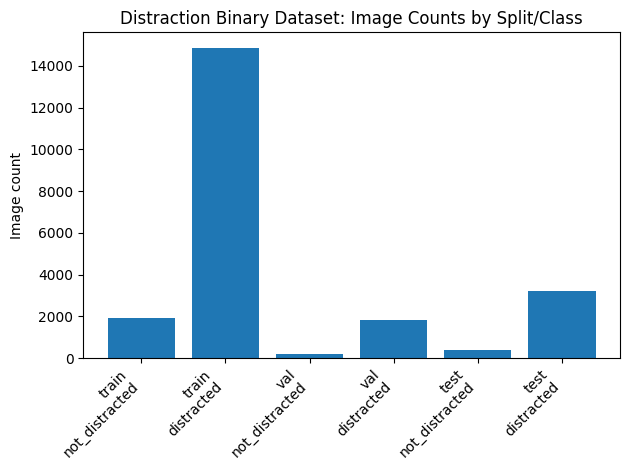

In [2]:
counts = {}
for split in SPLITS:
    for cls in CLASSES:
        p = DATA_ROOT / split / cls
        counts[(split, cls)] = len(list(p.glob("*.jpg"))) + len(list(p.glob("*.png")))

counts

labels = [f"{s}\n{c}" for s in SPLITS for c in CLASSES]
values = [counts[(s, c)] for s in SPLITS for c in CLASSES]

plt.figure()
plt.bar(labels, values)
plt.ylabel("Image count")
plt.title("Distraction Binary Dataset: Image Counts by Split/Class")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

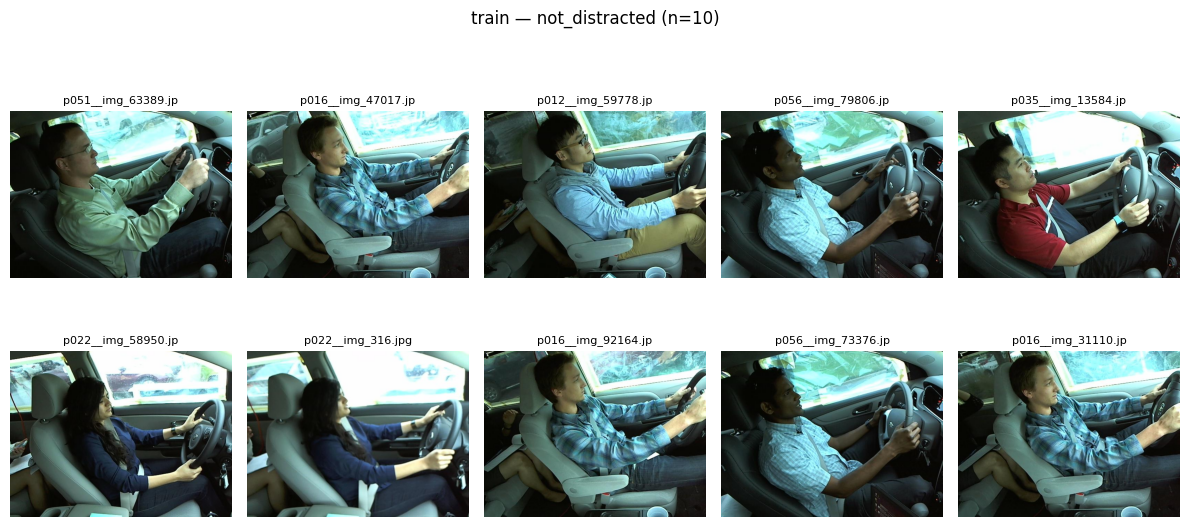

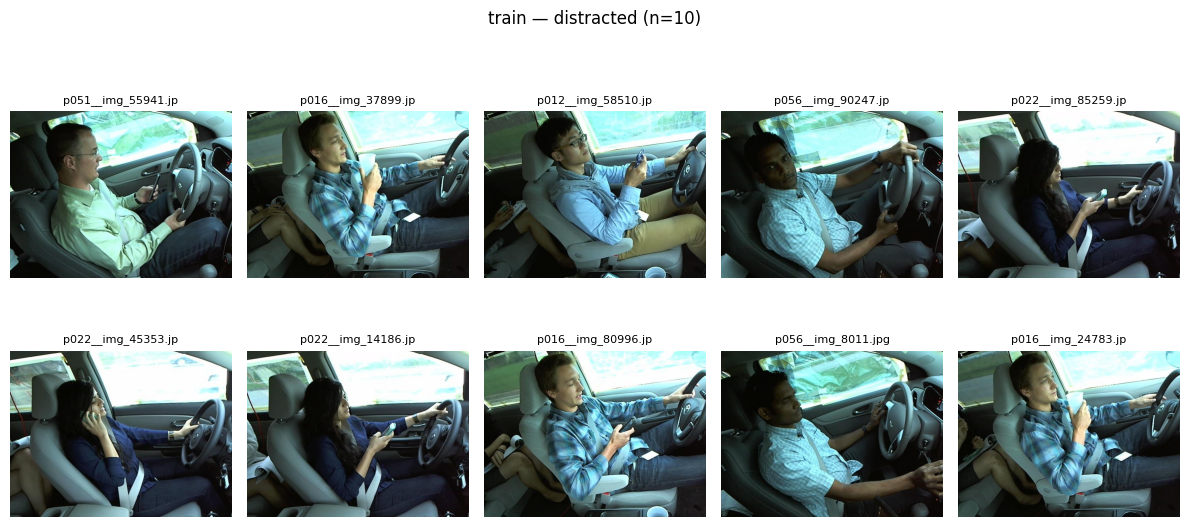

In [3]:
def show_samples(split: str, cls: str, n: int = 10, seed: int = 42):
    folder = DATA_ROOT / split / cls
    imgs = list(folder.glob("*.jpg")) + list(folder.glob("*.png"))
    assert len(imgs) >= n, f"Not enough images in {folder}"
    rng = random.Random(seed)
    picks = rng.sample(imgs, n)

    plt.figure(figsize=(12, 6))
    for i, img_path in enumerate(picks, 1):
        im = Image.open(img_path)
        plt.subplot(2, 5, i)
        plt.imshow(im)
        plt.axis("off")
        plt.title(img_path.name[:18], fontsize=8)
    plt.suptitle(f"{split} — {cls} (n={n})")
    plt.tight_layout()
    plt.show()

show_samples("train", "not_distracted", 10)
show_samples("train", "distracted", 10)

In [4]:
def drivers_in_split(split: str):
    drivers = set()
    for cls in CLASSES:
        folder = DATA_ROOT / split / cls
        for p in folder.glob("*.jpg"):
            # expects format: <driver>__<orig>.jpg
            drivers.add(p.name.split("__", 1)[0])
        for p in folder.glob("*.png"):
            drivers.add(p.name.split("__", 1)[0])
    return drivers

drivers_train = drivers_in_split("train")
drivers_val = drivers_in_split("val")
drivers_test = drivers_in_split("test")

len(drivers_train), len(drivers_val), len(drivers_test)

overlap_tv = drivers_train & drivers_val
overlap_tt = drivers_train & drivers_test
overlap_vt = drivers_val & drivers_test

print("train ∩ val:", len(overlap_tv))
print("train ∩ test:", len(overlap_tt))
print("val ∩ test:", len(overlap_vt))

assert len(overlap_tv) == 0 and len(overlap_tt) == 0 and len(overlap_vt) == 0, "Driver overlap detected!"
print("✅ No driver overlap across splits.")

train ∩ val: 0
train ∩ test: 0
val ∩ test: 0
✅ No driver overlap across splits.
